In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import operator

In [36]:
##import the dataset
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [37]:
##change string value to integer according to their type
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)
##delete nan value
dataset.dropna(inplace = True)

In [38]:
x = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [39]:
model = RandomForestRegressor()

In [40]:
model.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score = accuracy_score(y_test, y_pred)

In [42]:
print(score)

0.9357387411114038


In [9]:
importance = model.feature_importances_
importance

array([7.66074271e-04, 1.22085430e-01, 5.09477470e-03, 1.45081683e-02,
       1.74736118e-02, 2.08043000e-02, 1.02386168e-01, 3.42092614e-03,
       2.49388147e-03, 2.48177591e-03, 5.65717834e-04, 1.82838073e-03,
       3.73120386e-04, 1.71612092e-03, 2.44539667e-04, 5.78850392e-06,
       2.25760225e-04, 5.67786971e-05, 9.11550731e-05, 2.05480311e-02,
       1.44891829e-02, 3.38220418e-03, 3.43495485e-03, 2.52224851e-02,
       1.16006380e-02, 7.01490900e-04, 4.33132571e-03, 3.85972866e-03,
       1.55153324e-02, 8.72057555e-03, 2.24919802e-03, 3.38290750e-03,
       1.54711072e-04, 4.89879794e-06, 2.11701272e-03, 0.00000000e+00,
       1.06017182e-02, 2.80703114e-03, 1.61008237e-03, 1.00723636e-03,
       1.60153275e-03, 3.00241874e-03, 9.68031759e-03, 4.59232054e-04,
       1.02256716e-02, 2.97147134e-02, 2.58802294e-02, 6.59461809e-03,
       9.74600161e-03, 6.01094709e-04, 3.40359437e-02, 3.57697552e-03,
       3.30995860e-03, 5.32454971e-03, 2.69007654e-03, 1.96456390e-04,
      

Feature: 0, Score: 0.00077
Feature: 1, Score: 0.12209
Feature: 2, Score: 0.00509
Feature: 3, Score: 0.01451
Feature: 4, Score: 0.01747
Feature: 5, Score: 0.02080
Feature: 6, Score: 0.10239
Feature: 7, Score: 0.00342
Feature: 8, Score: 0.00249
Feature: 9, Score: 0.00248
Feature: 10, Score: 0.00057
Feature: 11, Score: 0.00183
Feature: 12, Score: 0.00037
Feature: 13, Score: 0.00172
Feature: 14, Score: 0.00024
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00023
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.02055
Feature: 20, Score: 0.01449
Feature: 21, Score: 0.00338
Feature: 22, Score: 0.00343
Feature: 23, Score: 0.02522
Feature: 24, Score: 0.01160
Feature: 25, Score: 0.00070
Feature: 26, Score: 0.00433
Feature: 27, Score: 0.00386
Feature: 28, Score: 0.01552
Feature: 29, Score: 0.00872
Feature: 30, Score: 0.00225
Feature: 31, Score: 0.00338
Feature: 32, Score: 0.00015
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00212
Feature: 35, Score: 0.00000
Fe

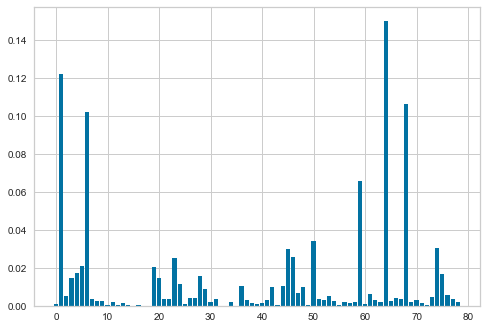

In [10]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [11]:
sort_importance = np.sort(importance)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00009
Feature: 5, Score: 0.00015
Feature: 6, Score: 0.00020
Feature: 7, Score: 0.00023
Feature: 8, Score: 0.00024
Feature: 9, Score: 0.00037
Feature: 10, Score: 0.00046
Feature: 11, Score: 0.00052
Feature: 12, Score: 0.00057
Feature: 13, Score: 0.00060
Feature: 14, Score: 0.00070
Feature: 15, Score: 0.00077
Feature: 16, Score: 0.00101
Feature: 17, Score: 0.00117
Feature: 18, Score: 0.00131
Feature: 19, Score: 0.00149
Feature: 20, Score: 0.00160
Feature: 21, Score: 0.00161
Feature: 22, Score: 0.00172
Feature: 23, Score: 0.00183
Feature: 24, Score: 0.00198
Feature: 25, Score: 0.00201
Feature: 26, Score: 0.00201
Feature: 27, Score: 0.00204
Feature: 28, Score: 0.00205
Feature: 29, Score: 0.00212
Feature: 30, Score: 0.00225
Feature: 31, Score: 0.00246
Feature: 32, Score: 0.00248
Feature: 33, Score: 0.00249
Feature: 34, Score: 0.00269
Feature: 35, Score: 0.00281
Fe

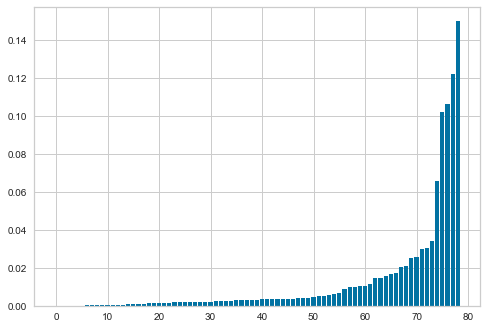

In [12]:
for i,v in enumerate(sort_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], sort_importance)
pyplot.show()

In [13]:
##convert numpy to dict
d = dict(enumerate(importance, 0)) 

In [14]:
##sorted by value
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d 

[(35, 0.0),
 (33, 4.898797939533372e-06),
 (15, 5.788503915265059e-06),
 (17, 5.677869706386699e-05),
 (18, 9.115507313201693e-05),
 (32, 0.0001547110719179565),
 (55, 0.00019645639008969144),
 (16, 0.0002257602246952761),
 (14, 0.00024453966738746235),
 (12, 0.0003731203863010108),
 (43, 0.00045923205415904363),
 (72, 0.0005208996149824525),
 (10, 0.0005657178339885741),
 (49, 0.0006010947093215441),
 (25, 0.0007014908995363645),
 (0, 0.0007660742705149341),
 (39, 0.0010072363627468349),
 (60, 0.0011727908175297613),
 (71, 0.0013149304938044274),
 (57, 0.0014902692408402748),
 (40, 0.0016015327500810566),
 (38, 0.0016100823677046442),
 (13, 0.001716120919702628),
 (11, 0.0018283807259334972),
 (63, 0.0019814100098260647),
 (58, 0.002012366886873081),
 (78, 0.002014996671512709),
 (56, 0.0020353563555568117),
 (69, 0.0020524491195725086),
 (34, 0.0021170127182507954),
 (30, 0.002249198018229473),
 (65, 0.002458340001486088),
 (9, 0.002481775908172998),
 (8, 0.0024938814691547488),
 (54

In [15]:
dataset
print(dataset.shape)

(18982, 80)


In [16]:
dataset.drop([dataset.columns[35],dataset.columns[15],dataset.columns[33],dataset.columns[17],dataset.columns[18]], axis=1,inplace=True)

print(dataset.shape)

(18982, 75)


In [17]:
x = dataset.iloc[:, 0:74].values
y = dataset.iloc[:, 74].values
y=y.astype('int')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score1 = accuracy_score(y_test, y_pred)

In [19]:
print(score1)

0.9367922043718725


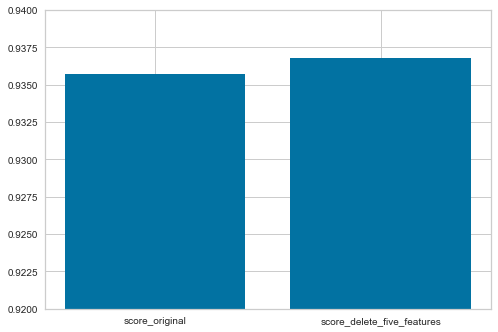

In [20]:
a=['score_original', 'score_delete_five_features']
b=[score,score1]
pyplot.ylim(0.92, 0.94)
pyplot.bar(a,b)
pyplot.show()

conclusion: with deleting 5 least related features, the score gets higher.

In [21]:
dataset.shape

(18982, 75)

In [22]:
model.fit(x, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
importance = model.feature_importances_
d = dict(enumerate(importance, 0)) 
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d 
sorted_indices = np.argsort(importance)[::-1]
print(sorted_indices[73])


29


In [24]:
dataset.drop([dataset.columns[29],dataset.columns[50],dataset.columns[15],dataset.columns[14],dataset.columns[12]], axis=1,inplace=True)

print(dataset.shape)

(18982, 70)


In [25]:
x = dataset.iloc[:, 0:69].values
y = dataset.iloc[:, 69].values
y=y.astype('int')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score2 = accuracy_score(y_test, y_pred)
print(score2)

0.9336318145904662


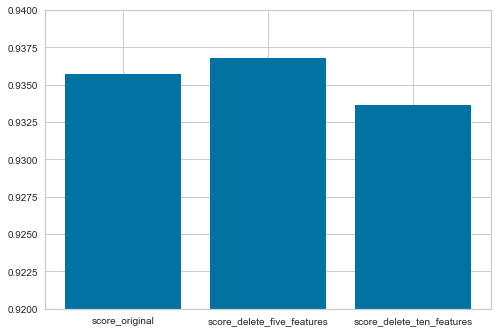

In [27]:
a=['score_original', 'score_delete_five_features','score_delete_ten_features']
b=[score,score1,score2]
pyplot.ylim(0.92, 0.94)
pyplot.bar(a,b)
pyplot.show()

conclusion: with deleting 5 least related features, the score gets higher.
with deleting 10 least related features, the score gets lower.

In [44]:
d

{0: 0.0006143233933578441,
 1: 0.07953622241535876,
 2: 0.0047994618352169205,
 3: 0.013927545869859387,
 4: 0.018669734221647135,
 5: 0.01691846923762505,
 6: 0.13437408698912032,
 7: 0.0031211568378043232,
 8: 0.0028133824259413904,
 9: 0.0029276454459113976,
 10: 0.000610601558638127,
 11: 0.001883189844330324,
 12: 0.00046160820635092616,
 13: 0.0017959237862245504,
 14: 0.00035978411826148864,
 15: 0.0003561021265976686,
 16: 0.02073240322788049,
 17: 0.01422882839126296,
 18: 0.0033710869277946247,
 19: 0.003435273676373,
 20: 0.024980888565228086,
 21: 0.011075931567019755,
 22: 0.0007518249110666009,
 23: 0.0036928015707640544,
 24: 0.0037282549807851214,
 25: 0.01936679735284592,
 26: 0.008028966877363286,
 27: 0.0023449871009823906,
 28: 0.003376395645601263,
 29: 0.00013419480399902287,
 30: 0.0021293074767508705,
 31: 0.009941520989290296,
 32: 0.002526895970058206,
 33: 0.0017205176967578875,
 34: 0.0009281471377453194,
 35: 0.0014757509662876754,
 36: 0.00331383555868291,